In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df1=pd.DataFrame(np.random.rand(6,5),columns=list('abcdf'))
df1

,a,b,c,d,f
0,0.872528,0.290747,0.378637,0.617672,0.452422
1,0.548404,0.227635,0.092443,0.924086,0.910704
2,0.152848,0.384304,0.822392,0.669626,0.657017
3,0.875684,0.732919,0.869195,0.525480,0.240903
4,0.674855,0.311210,0.250481,0.674895,0.556538
5,0.806685,0.648253,0.407254,0.158980,0.564235


In [3]:

def best_offer3(x,y,z,delta):
    list1=[]
    list1.append(x)
    list1.append(y)
    list1.append(z)
    return list1   

def best_offer4(x,y,z,delta):
    
    max_elem=np.max(best_offer3(x,y,z,delta))
    index_max_elem=best_offer3(x,y,z,delta).index(max_elem)
    t=best_offer3(x,y,z,delta)
    t.remove(max_elem)
    second_max_elem=np.max(t)
    index_second_max_elem=best_offer3(x,y,z,delta).index(second_max_elem)
    if max_elem-second_max_elem>delta:
        
        a = ((index_max_elem==0 and 'a') or 
         (index_max_elem==1 and 'b') or 
         (index_max_elem==2 and 'c')
        )
    else:
        a='random'
    
    return a
    
def best_offer5(delta):
    a1='a'
    b1='b'
    c1='c'
    d1='random'
    r=df1[[a1,b1,c1]].apply(lambda x:best_offer4(x[a1],x[b1],x[c1],delta),axis=1)
    r1=r.tolist().count(a1)
    r2=r.tolist().count(b1)
    r3=r.tolist().count(c1)
    r4=r.tolist().count(d1)
    return r1,r2,r3,r4
    

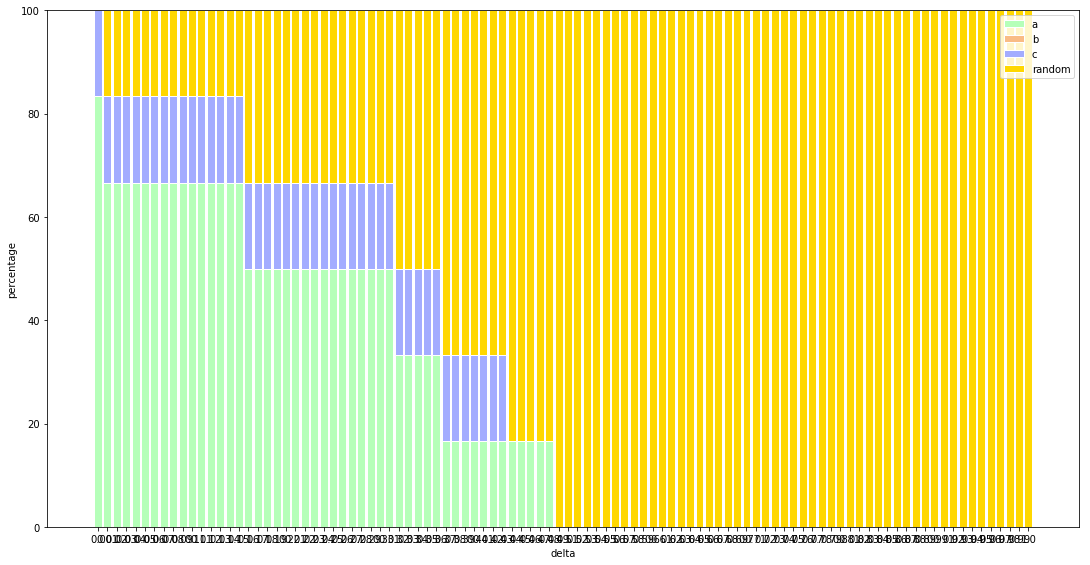

Wall time: 5.18 s


In [28]:
%%time
a1='a'
b1='b'
c1='c'
d1='random'

bins=100
start=0
end=1
list2=[]
for i in np.linspace(start,end,bins):
    list2.append(best_offer5(i))

a=[x[0] for x in list2]
b=[x[1] for x in list2]
c=[x[2] for x in list2]
d=[x[3] for x in list2]
r = np.arange(bins)
raw_data = {a1: a, b1: b,c1: c,d1: d}
df = pd.DataFrame(raw_data)  

df['totals']=df.sum(axis=1)
percents = df.div(df['totals'], axis=0)
percents=percents.drop('totals', axis=1)*100

fig = plt.gcf()
barWidth = 0.85
plt.bar(r, percents[a1], color='#b5ffb9',edgecolor='white',width=barWidth,label=a1)
plt.bar(r, percents[b1], bottom=percents[a1], color='#f9bc86',edgecolor='white', width=barWidth,label=b1)
plt.bar(r, percents[c1], bottom=percents[a1]+percents[b1], color='#a3acff',edgecolor='white', width=barWidth,label=c1)
plt.bar(r, percents[d1], bottom=percents[a1]+percents[b1]+percents[c1], color='gold',edgecolor='white', width=barWidth,label=d1)
plt.xticks(r, [round(i,2) for i in np.linspace(start,end,bins).tolist()])
plt.legend()
plt.xlabel('delta')
plt.ylabel('percentage')
fig.set_size_inches(18.5, 9.5, forward=True)
plt.show()